In [3]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None

In [6]:
###Import af data



dfpogo = pd.read_csv('290824moist.csv')

dfstimp = pd.read_csv('2900824stimp.csv')



print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())


Pogo:
       Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)
count     36.0           36.000000           36.000000           36.000000
mean       1.0           25.138889           18.583333           33.444444
std        0.0            3.041079            3.174677            3.945663
min        1.0           16.100000           12.000000           24.000000
25%        1.0           23.050000           16.750000           31.000000
50%        1.0           25.800000           19.000000           34.000000
75%        1.0           27.325000           21.000000           35.000000
max        1.0           30.500000           25.000000           42.000000

Stimp:
         Stimp CM  Bobble  Chatter  Snaking  Trueness
count  322.000000     0.0      0.0      0.0       0.0
mean   325.236025     NaN      NaN      NaN       NaN
std     30.804279     NaN      NaN      NaN       NaN
min    246.000000     NaN      NaN      NaN       NaN
25%    305.000000     NaN      NaN      

In [7]:
###Datacleaning - Drop values + cols 



dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])


print(dfstimp.head())

         Dato     Hul  Stimp CM Stimp F
0  10/05/2023  Hul 15     249.0     8,2
1  10/05/2023  Hul 15     246.0     8,1
2  10/05/2023  Hul 15     248.0     8,1
3  10/05/2023  Hul 15     273.0     9,0
4  10/05/2023  Hul 15     280.0     9,2


In [8]:
dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])

In [14]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9.9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)

In [17]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta


dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')


dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week

dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year


print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())


Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Year
0 2023-05-10  Hul 15     249.0      8.2         Low    19  2023
1 2023-05-10  Hul 15     246.0      8.1         Low    19  2023
2 2023-05-10  Hul 15     248.0      8.1         Low    19  2023
3 2023-05-10  Hul 15     273.0      9.0         Low    19  2023
4 2023-05-10  Hul 15     280.0      9.2         Low    19  2023

Cleaned dfpogo:
       Zone  Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  \
0  11 Green        1                22.5                  18   
1  04 Green        1                27.1                  16   
2  17 Green        1                26.2                  21   
3  13 Green        1                20.0                  17   
4  16 Green        1                27.1                  19   

   Moisture (Max) (%)       Dato      Time  Week  Year  
0                  31 2024-08-27  11:10:38    35  2024  
1                  35 2024-08-27  11:13:27    35  2024  
2                  35 202

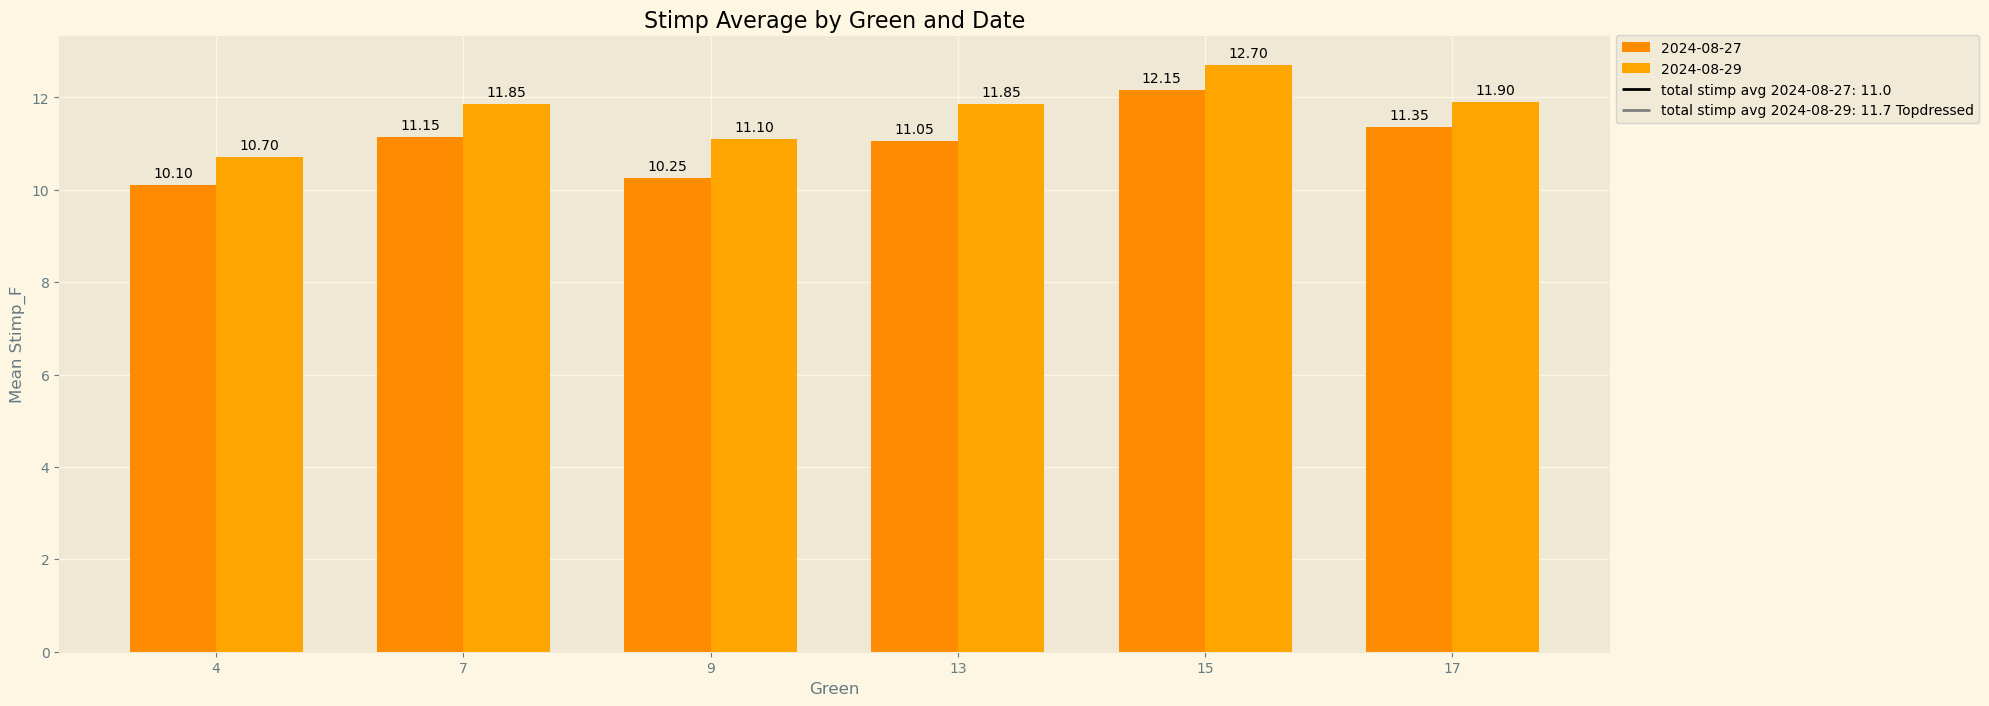

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for the two specific dates
date1 = '2024-08-27'
date2 = '2024-08-29'

df_filtered_date1 = dfstimp[dfstimp['Dato'] == date1]
df_filtered_date2 = dfstimp[dfstimp['Dato'] == date2]

# Ensure 'Hul' column is in the correct format
df_filtered_date1['Hul'] = df_filtered_date1['Hul'].astype(str).str.extract('(\d+)').astype(int)
df_filtered_date2['Hul'] = df_filtered_date2['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the greens
greens = [4, 7, 9, 13, 15, 17]

# Calculate the mean Stimp_F for each green for both dates
mean_stimp_f_date1 = [df_filtered_date1[df_filtered_date1['Hul'] == green]['Stimp_F'].mean() for green in greens]
mean_stimp_f_date2 = [df_filtered_date2[df_filtered_date2['Hul'] == green]['Stimp_F'].mean() for green in greens]

# Calculate the total mean Stimp_F for all selected greens for both dates
total_mean_stimp_f_date1 = df_filtered_date1['Stimp_F'].mean()
total_mean_stimp_f_date2 = df_filtered_date2['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Width of the bars
bar_width = 0.35
index = range(len(greens))

# Plotting bars for the two dates
bars1 = plt.bar(index, mean_stimp_f_date1, bar_width, color='darkorange', label=f'{date1}')
bars2 = plt.bar([i + bar_width for i in index], mean_stimp_f_date2, bar_width, color='orange', label=f'{date2}')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Average by Green and Date')
plt.xticks([i + bar_width/2 for i in index], labels=[str(green) for green in greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg {date1}: {total_mean_stimp_f_date1:.1f}'))
handles.append(plt.Line2D([], [], color='grey', label=f'total stimp avg {date2}: {total_mean_stimp_f_date2:.1f} Topdressed'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.929))

# Adding labels with the values on each bar
for bars, mean_stimp_f in zip([bars1, bars2], [mean_stimp_f_date1, mean_stimp_f_date2]):
    for bar, mean in zip(bars, mean_stimp_f):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{mean:.2f}', ha='center', va='bottom')

# Displaying the plot
plt.show()

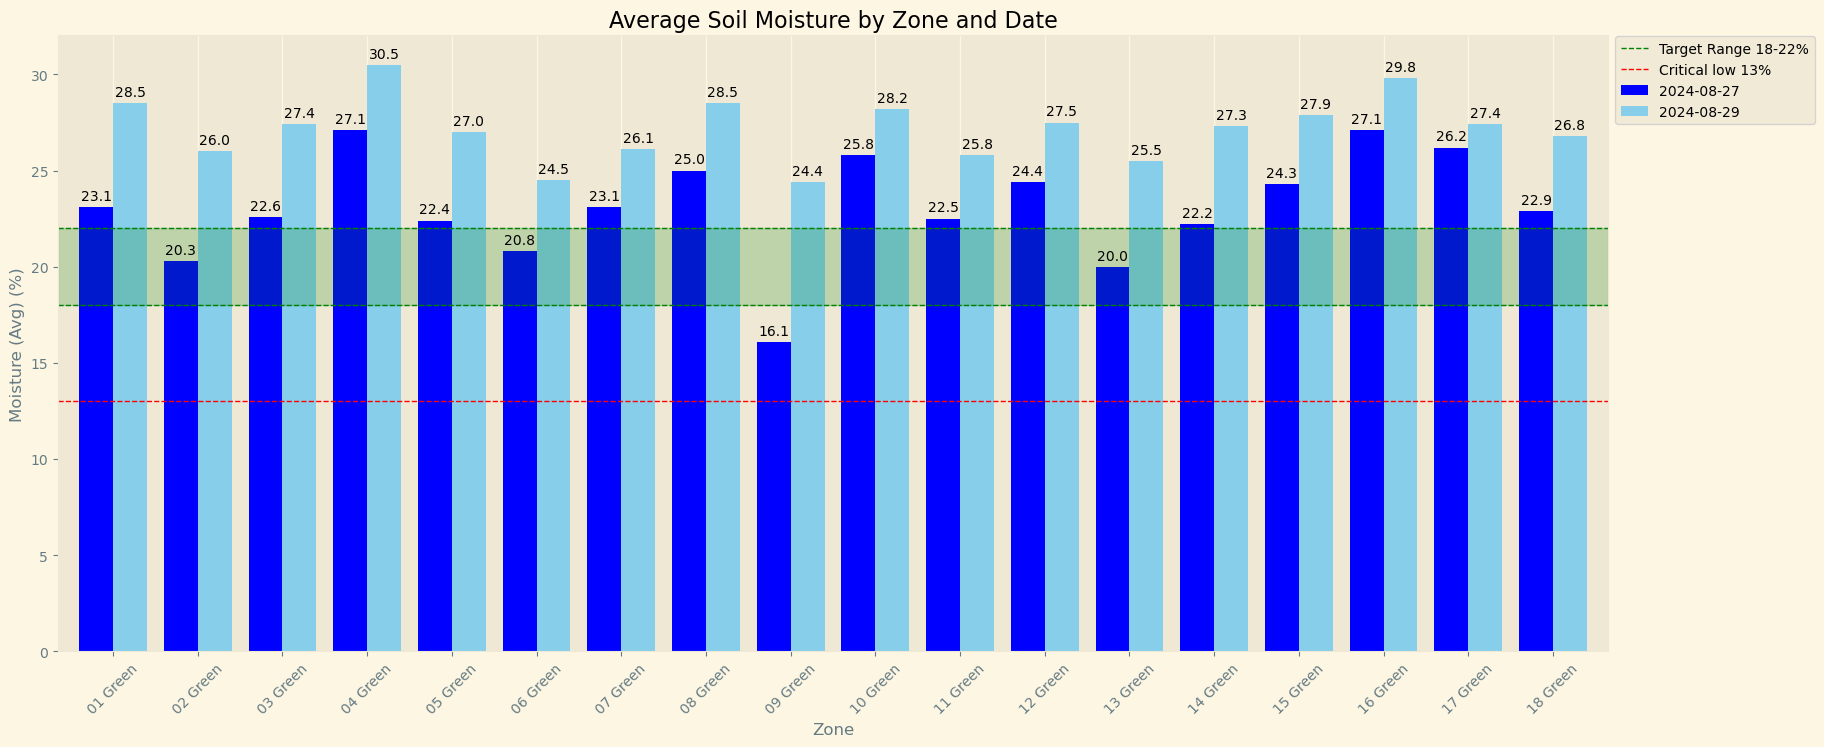

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'])

# Extract just the date part from 'Sample Date'
dfpogo['Dato'] = dfpogo['Dato'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = dfpogo.groupby(['Zone', 'Dato'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting the bar chart
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding green dotted lines at 18% and 22%
line1 = plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
line2 = plt.axhline(y=22, color='green', linestyle='--', linewidth=1)

# Adding a red dotted line at 13%
line3 = plt.axhline(y=13, color='red', linestyle='--', linewidth=1, label='Critical low 13%')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Getting bar plot legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Adding the note to the first date label


# Getting handles and labels for the lines
line_handles, line_labels = ax.get_legend_handles_labels()

# Adding the updated legend to the plot
ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()
